# Bar Charts

## Bar Chart

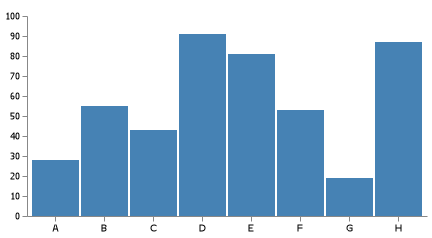

In [2]:
using VegaLite

@vgplot(
    height=200,
    padding=5,
    marks=[
        {
            encode={
                update={
                    fill={
                        value="steelblue"
                    }
                },
                hover={
                    fill={
                        value="red"
                    }
                },
                enter={
                    x={
                        field="category",
                        scale="xscale"
                    },
                    y2={
                        value=0,
                        scale="yscale"
                    },
                    width={
                        scale="xscale",
                        band=1
                    },
                    y={
                        field="amount",
                        scale="yscale"
                    }
                }
            },
            from={
                data="table"
            },
            type="rect"
        },
        {
            encode={
                update={
                    x={
                        signal="tooltip.category",
                        scale="xscale",
                        band=0.5
                    },
                    fillOpacity=[
                        {
                            test="datum === tooltip",
                            value=0
                        },
                        {
                            value=1
                        }
                    ],
                    text={
                        signal="tooltip.amount"
                    },
                    y={
                        offset=-2,
                        signal="tooltip.amount",
                        scale="yscale"
                    }
                },
                enter={
                    fill={
                        value="#333"
                    },
                    baseline={
                        value="bottom"
                    },
                    align={
                        value="center"
                    }
                }
            },
            type="text"
        }
    ],
    axes=[
        {
            scale="xscale",
            orient="bottom"
        },
        {
            scale="yscale",
            orient="left"
        }
    ],
    data=[
        {
            name="table",
            values=[
                {
                    amount=28,
                    category="A"
                },
                {
                    amount=55,
                    category="B"
                },
                {
                    amount=43,
                    category="C"
                },
                {
                    amount=91,
                    category="D"
                },
                {
                    amount=81,
                    category="E"
                },
                {
                    amount=53,
                    category="F"
                },
                {
                    amount=19,
                    category="G"
                },
                {
                    amount=87,
                    category="H"
                }
            ]
        }
    ],
    scales=[
        {
            name="xscale",
            padding=0.05,
            range="width",
            domain={
                data="table",
                field="category"
            },
            type="band",
            round=true
        },
        {
            name="yscale",
            nice=true,
            range="height",
            domain={
                data="table",
                field="amount"
            }
        }
    ],
    width=400,
    signals=[
        {
            name="tooltip",
            on=[
                {
                    events="rect:mouseover",
                    update="datum"
                },
                {
                    events="rect:mouseout",
                    update="{}"
                }
            ],
            value={

            }
        }
    ]
)

## Stacked Bar Chart

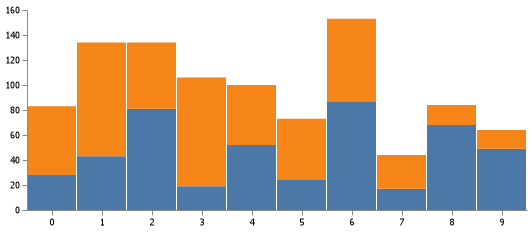

In [3]:
using VegaLite

@vgplot(    
    height=200,
    padding=5,
    marks=[
        {
            encode={
                update={
                    fillOpacity={
                        value=1
                    }
                },
                hover={
                    fillOpacity={
                        value=0.5
                    }
                },
                enter={
                    x={
                        field="x",
                        scale="x"
                    },
                    y2={
                        field="y1",
                        scale="y"
                    },
                    width={
                        offset=-1,
                        scale="x",
                        band=1
                    },
                    fill={
                        field="c",
                        scale="color"
                    },
                    y={
                        field="y0",
                        scale="y"
                    }
                }
            },
            from={
                data="table"
            },
            type="rect"
        }
    ],
    axes=[
        {
            zindex=1,
            scale="x",
            orient="bottom"
        },
        {
            zindex=1,
            scale="y",
            orient="left"
        }
    ],
    data=[
        {
            name="table",
            values=[
                {
                    c=0,
                    x=0,
                    y=28
                },
                {
                    c=1,
                    x=0,
                    y=55
                },
                {
                    c=0,
                    x=1,
                    y=43
                },
                {
                    c=1,
                    x=1,
                    y=91
                },
                {
                    c=0,
                    x=2,
                    y=81
                },
                {
                    c=1,
                    x=2,
                    y=53
                },
                {
                    c=0,
                    x=3,
                    y=19
                },
                {
                    c=1,
                    x=3,
                    y=87
                },
                {
                    c=0,
                    x=4,
                    y=52
                },
                {
                    c=1,
                    x=4,
                    y=48
                },
                {
                    c=0,
                    x=5,
                    y=24
                },
                {
                    c=1,
                    x=5,
                    y=49
                },
                {
                    c=0,
                    x=6,
                    y=87
                },
                {
                    c=1,
                    x=6,
                    y=66
                },
                {
                    c=0,
                    x=7,
                    y=17
                },
                {
                    c=1,
                    x=7,
                    y=27
                },
                {
                    c=0,
                    x=8,
                    y=68
                },
                {
                    c=1,
                    x=8,
                    y=16
                },
                {
                    c=0,
                    x=9,
                    y=49
                },
                {
                    c=1,
                    x=9,
                    y=15
                }
            ],
            transform=[
                {
                    sort={
                        field="c"
                    },
                    field="y",
                    groupby=[
                        "x"
                    ],
                    type="stack"
                }
            ]
        }
    ],
    scales=[
        {
            name="x",
            range="width",
            domain={
                data="table",
                field="x"
            },
            type="band"
        },
        {
            name="y",
            nice=true,
            zero=true,
            range="height",
            domain={
                data="table",
                field="y1"
            },
            type="linear"
        },
        {
            name="color",
            range="category",
            domain={
                data="table",
                field="c"
            },
            type="ordinal"
        }
    ],
    width=500
)

## Grouped Bar Chart

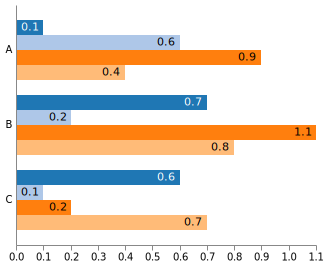

In [4]:
using VegaLite, DisplayAs

@vgplot(
    height=240,
    padding=5,
    marks=[
        {
            marks=[
                {
                    name="bars",
                    encode={
                        enter={
                            height={
                                scale="pos",
                                band=1
                            },
                            x2={
                                value=0,
                                scale="xscale"
                            },
                            x={
                                field="value",
                                scale="xscale"
                            },
                            fill={
                                field="position",
                                scale="color"
                            },
                            y={
                                field="position",
                                scale="pos"
                            }
                        }
                    },
                    from={
                        data="facet"
                    },
                    type="rect"
                },
                {
                    encode={
                        enter={
                            align={
                                value="right"
                            },
                            x={
                                offset=-5,
                                field="x2"
                            },
                            fill=[
                                {
                                    test="contrast('white', datum.fill) > contrast('black', datum.fill)",
                                    value="white"
                                },
                                {
                                    value="black"
                                }
                            ],
                            baseline={
                                value="middle"
                            },
                            text={
                                field="datum.value"
                            },
                            y={
                                offset={
                                    mult=0.5,
                                    field="height"
                                },
                                field="y"
                            }
                        }
                    },
                    from={
                        data="bars"
                    },
                    type="text"
                }
            ],
            encode={
                enter={
                    y={
                        field="category",
                        scale="yscale"
                    }
                }
            },
            scales=[
                {
                    name="pos",
                    range="height",
                    domain={
                        data="facet",
                        field="position"
                    },
                    type="band"
                }
            ],
            signals=[
                {
                    name="height",
                    update="bandwidth('yscale')"
                }
            ],
            from={
                facet={
                    name="facet",
                    data="table",
                    groupby="category"
                }
            },
            type="group"
        }
    ],
    axes=[
        {
            labelPadding=4,
            zindex=1,
            scale="yscale",
            orient="left",
            tickSize=0
        },
        {
            scale="xscale",
            orient="bottom"
        }
    ],
    data=[
        {
            name="table",
            values=[
                {
                    position=0,
                    value=0.1,
                    category="A"
                },
                {
                    position=1,
                    value=0.6,
                    category="A"
                },
                {
                    position=2,
                    value=0.9,
                    category="A"
                },
                {
                    position=3,
                    value=0.4,
                    category="A"
                },
                {
                    position=0,
                    value=0.7,
                    category="B"
                },
                {
                    position=1,
                    value=0.2,
                    category="B"
                },
                {
                    position=2,
                    value=1.1,
                    category="B"
                },
                {
                    position=3,
                    value=0.8,
                    category="B"
                },
                {
                    position=0,
                    value=0.6,
                    category="C"
                },
                {
                    position=1,
                    value=0.1,
                    category="C"
                },
                {
                    position=2,
                    value=0.2,
                    category="C"
                },
                {
                    position=3,
                    value=0.7,
                    category="C"
                }
            ]
        }
    ],
    scales=[
        {
            name="yscale",
            padding=0.2,
            range="height",
            domain={
                data="table",
                field="category"
            },
            type="band"
        },
        {
            name="xscale",
            zero=true,
            nice=true,
            range="width",
            domain={
                data="table",
                field="value"
            },
            type="linear",
            round=true
        },
        {
            name="color",
            range={
                scheme="category20"
            },
            domain={
                data="table",
                field="position"
            },
            type="ordinal"
        }
    ],
    width=300
) |> DisplayAs.SVG

## Nested Bar Chart

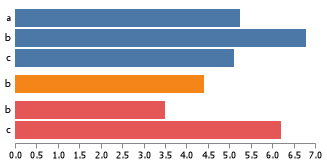

In [5]:
using VegaLite

@vgplot(
    padding=5,
    marks=[
        {
            marks=[
                {
                    encode={
                        update={
                            height={
                                scale="yscale",
                                band=1
                            },
                            stroke={
                                value=nothing
                            },
                            zindex={
                                value=0
                            },
                            y={
                                field="b",
                                scale="yscale"
                            }
                        },
                        hover={
                            stroke={
                                value="firebrick"
                            },
                            zindex={
                                value=1
                            }
                        },
                        enter={
                            x2={
                                field="c",
                                scale="xscale"
                            },
                            x={
                                value=0
                            },
                            strokeWidth={
                                value=2
                            },
                            fill={
                                field="a",
                                scale="color"
                            }
                        }
                    },
                    from={
                        data="faceted_tuples"
                    },
                    type="rect"
                }
            ],
            encode={
                update={
                    y2={
                        field="y1"
                    },
                    y={
                        field="y0"
                    }
                },
                enter={
                    x={
                        value=0
                    },
                    width={
                        signal="width"
                    }
                }
            },
            axes=[
                {
                    domain=false,
                    labelPadding=4,
                    scale="yscale",
                    orient="left",
                    ticks=false
                }
            ],
            scales=[
                {
                    name="yscale",
                    paddingOuter={
                        signal="outerPadding"
                    },
                    paddingInner={
                        signal="innerPadding"
                    },
                    domain={
                        data="faceted_tuples",
                        field="b"
                    },
                    range={
                        step={
                            signal="rangeStep"
                        }
                    },
                    type="band",
                    round=true
                }
            ],
            from={
                data="trellis",
                facet={
                    name="faceted_tuples",
                    data="tuples",
                    groupby="a"
                }
            },
            type="group"
        }
    ],
    axes=[
        {
            domain=true,
            scale="xscale",
            orient="bottom"
        }
    ],
    data=[
        {
            name="tuples",
            values=[
                {
                    c=6.3,
                    b="a",
                    a=0
                },
                {
                    c=4.2,
                    b="a",
                    a=0
                },
                {
                    c=6.8,
                    b="b",
                    a=0
                },
                {
                    c=5.1,
                    b="c",
                    a=0
                },
                {
                    c=4.4,
                    b="b",
                    a=1
                },
                {
                    c=3.5,
                    b="b",
                    a=2
                },
                {
                    c=6.2,
                    b="c",
                    a=2
                }
            ],
            transform=[
                {
                    fields=[
                        "c"
                    ],
                    ops=[
                        "average"
                    ],
                    as=[
                        "c"
                    ],
                    groupby=[
                        "a",
                        "b"
                    ],
                    type="aggregate"
                }
            ]
        },
        {
            name="trellis",
            source="tuples",
            transform=[
                {
                    groupby=[
                        "a"
                    ],
                    type="aggregate"
                },
                {
                    as="span",
                    expr="rangeStep * bandspace(datum.count, innerPadding, outerPadding)",
                    type="formula"
                },
                {
                    field="span",
                    type="stack"
                },
                {
                    field="y1",
                    signal="trellisExtent",
                    type="extent"
                }
            ]
        }
    ],
    scales=[
        {
            name="xscale",
            nice=true,
            zero=true,
            range="width",
            domain={
                data="tuples",
                field="c"
            },
            round=true
        },
        {
            name="color",
            range="category",
            domain={
                data="trellis",
                field="a"
            },
            type="ordinal"
        }
    ],
    width=300,
    autosize="pad",
    signals=[
        {
            name="rangeStep",
            bind={
                step=1,
                max=50,
                min=5,
                input="range"
            },
            value=20
        },
        {
            name="innerPadding",
            bind={
                step=0.01,
                max=0.7,
                min=0,
                input="range"
            },
            value=0.1
        },
        {
            name="outerPadding",
            bind={
                step=0.01,
                max=0.4,
                min=0,
                input="range"
            },
            value=0.2
        },
        {
            name="height",
            update="trellisExtent[1]"
        }
    ]
)


## Population Pyramid

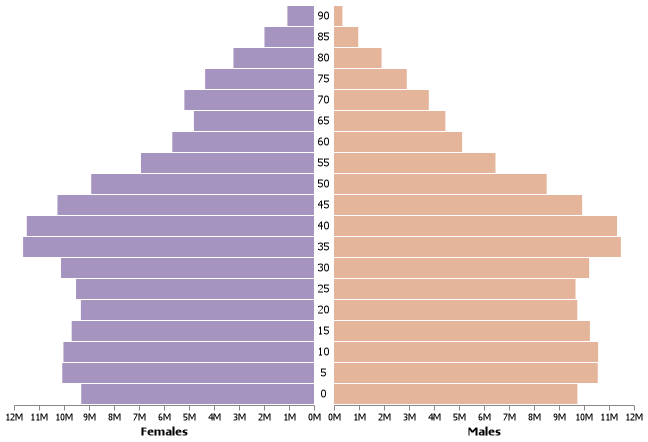

In [6]:
using VegaLite, VegaDatasets

@vgplot(
    height=400,
    padding=5,
    marks=[
        {
            encode={
                enter={
                    align={
                        value="center"
                    },
                    x={
                        signal="chartWidth + chartPad / 2"
                    },
                    text={
                        field="age"
                    },
                    baseline={
                        value="middle"
                    },
                    fill={
                        value="#000"
                    },
                    y={
                        field="age",
                        scale="y",
                        band=0.5
                    }
                }
            },
            interactive=false,
            from={
                data="ageGroups"
            },
            type="text"
        },
        {
            marks=[
                {
                    encode={
                        enter={
                            height={
                                offset=-1,
                                scale="y",
                                band=1
                            },
                            x2={
                                value=0,
                                scale="x"
                            },
                            x={
                                field="people",
                                scale="x"
                            },
                            fillOpacity={
                                value=0.6
                            },
                            fill={
                                field="sex",
                                scale="c"
                            },
                            y={
                                field="age",
                                scale="y"
                            }
                        }
                    },
                    from={
                        data="females"
                    },
                    type="rect"
                }
            ],
            encode={
                update={
                    height={
                        signal="height"
                    },
                    x={
                        value=0
                    }
                }
            },
            axes=[
                {
                    format="s",
                    title="Females",
                    scale="x",
                    orient="bottom"
                }
            ],
            scales=[
                {
                    name="x",
                    nice=true,
                    zero=true,
                    range=[
                        {
                            signal="chartWidth"
                        },
                        0
                    ],
                    domain={
                        data="population",
                        field="people"
                    },
                    type="linear"
                }
            ],
            type="group"
        },
        {
            marks=[
                {
                    encode={
                        enter={
                            height={
                                offset=-1,
                                scale="y",
                                band=1
                            },
                            x2={
                                value=0,
                                scale="x"
                            },
                            x={
                                field="people",
                                scale="x"
                            },
                            fillOpacity={
                                value=0.6
                            },
                            fill={
                                field="sex",
                                scale="c"
                            },
                            y={
                                field="age",
                                scale="y"
                            }
                        }
                    },
                    from={
                        data="males"
                    },
                    type="rect"
                }
            ],
            encode={
                update={
                    height={
                        signal="height"
                    },
                    x={
                        signal="chartWidth + chartPad"
                    }
                }
            },
            axes=[
                {
                    format="s",
                    title="Males",
                    scale="x",
                    orient="bottom"
                }
            ],
            scales=[
                {
                    name="x",
                    nice=true,
                    zero=true,
                    range=[
                        0,
                        {
                            signal="chartWidth"
                        }
                    ],
                    domain={
                        data="population",
                        field="people"
                    },
                    type="linear"
                }
            ],
            type="group"
        }
    ],
    data=[
        :population => dataset("population"),
        {
            name="popYear",
            source="population",
            transform=[
                {
                    expr="datum.year == year",
                    type="filter"
                }
            ]
        },
        {
            name="males",
            source="popYear",
            transform=[
                {
                    expr="datum.sex == 1",
                    type="filter"
                }
            ]
        },
        {
            name="females",
            source="popYear",
            transform=[
                {
                    expr="datum.sex == 2",
                    type="filter"
                }
            ]
        },
        {
            name="ageGroups",
            source="population",
            transform=[
                {
                    groupby=[
                        "age"
                    ],
                    type="aggregate"
                }
            ]
        }
    ],
    scales=[
        {
            name="y",
            range=[
                {
                    signal="height"
                },
                0
            ],
            domain={
                data="ageGroups",
                field="age"
            },
            type="band",
            round=true
        },
        {
            name="c",
            range=[
                "#d5855a",
                "#6c4e97"
            ],
            domain=[
                1,
                2
            ],
            type="ordinal"
        }
    ],
    signals=[
        {
            name="chartWidth",
            value=300
        },
        {
            name="chartPad",
            value=20
        },
        {
            name="width",
            update="2 * chartWidth + chartPad"
        },
        {
            name="year",
            bind={
                step=10,
                max=2000,
                min=1850,
                input="range"
            },
            value=2000
        }
    ]
)